### 데이터 개요

- ggplot2에서 제공하는 mpg 데이터 셋
- 1999년 부터 2008년 사이의 가장 대중적인 모델 38개 자동차에 대한 연비 효율을 기록한 데이터 셋
- 전체 관측 234개와 11개의 변수로 구성

### mpg 데이터 설명

- manufacturer : 제조사
- model : 모델
- displ : 엔진 크기
- year : 연식
- hwy : gallon 당 고속도로 주행 마일 수
- cyl : 실린더의 수
- trans : 변속기
- drv : 구동 방식 \
  사륜 (4), 전륜 (f), 후륜 (r)
- cty : gallon 당 도시 주행 마일 수

In [1]:
# 시각화 라이브러리 관련 파라미터 설정 
# 경고 메세지 안보이게 하기
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# 시각화를 위한 모듈 및 관련 파라미터 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [3]:
CHART_NAME = 'seabornTest'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = './data/mpg.csv'

mpg = pd.read_csv(filename, encoding='utf-8')

In [4]:
# 전체 데이터의 앞 10행 확인

print(mpg.columns)
# ['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty', 'hwy', 'fl', 'class']
print('-'*30)

print(mpg.head(10))
print('-'*30)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')
------------------------------
  manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0         audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2         audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3         audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4         audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5         audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6         audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7         audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8         audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9         audi  a4 quattro    2.0  2008    4  manual(m6)   4   20   

In [5]:
# 통계 정보 확인

print(mpg.describe())
print('-'*30)

            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000
max      7.000000  2008.000000    8.000000   35.000000   44.000000
------------------------------


In [6]:
# 이미지 저장하는 함수

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

In [7]:
# '엔진의 크기' 에 대하여 살펴 보고자 함.

import seaborn as sns

displ = mpg['displ'] # 시리즈
print('displ.unique()')
print(displ.unique())

displ.unique()
[1.8 2.  2.8 3.1 4.2 5.3 5.7 6.  6.2 7.  6.5 2.4 3.5 3.6 3.  3.3 3.8 4.
 3.7 3.9 4.7 5.2 5.9 4.6 5.4 5.  1.6 2.5 2.7 6.1 4.4 5.6 2.2 3.4 1.9]


In [8]:
import numpy as np
print(np.max(displ.unique()))
print(np.min(displ.unique()))

7.0
1.6


Text(0, 0.5, '값')

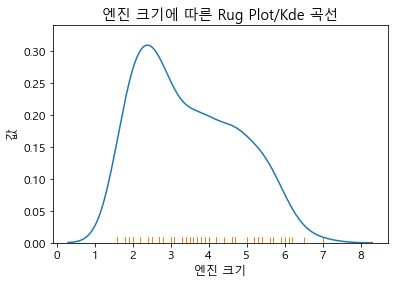

In [9]:
# 러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여주는 함수.

ax = plt.subplots()
sns.kdeplot(data=mpg, x="displ")
ax = sns.rugplot(data=mpg, x="displ")
ax.set_title('엔진 크기에 따른 Rug Plot/Kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')
# FileSave() # 이미지 저장

### 산점도와 Rug Plot (scatterplot)

- scatterplot 함수는 산점도를 그려주는 함수
- 매개변수 \
  x,y : 산점도의 x축, y축에 놓여질 데이터를 의미. \
  data : 사용하고자 하는 데이터 셋 지정. \
  hue : 다른 색상을 지정하기 위한 grouping 개념. \
  style : 그려질 모양을 구분하기 위하여 사용됨. \
  s : maker size를 지정.

Text(0, 0.5, '주행 마일수')

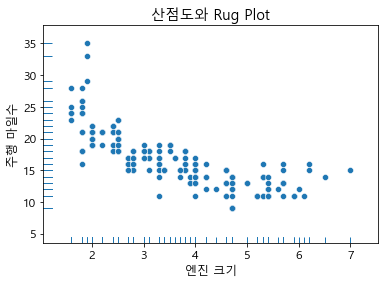

In [10]:
# x축은 엔진의 크기 , y축은 도시 주행 마일수를 이용하여 그래프를 그림.

ax = plt.subplots()
sns.scatterplot(data=mpg, x='displ', y='cty')
ax = sns.rugplot(data=mpg, x='displ', y='cty')
ax.set_title('산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

### 엔진 크기 히스토그램 (histplot)

- 매개변수 \
  data : 그리고자 하는 데이터 셋 지정 \
  x : 히스토그램을 그릴 데이터 컬럼 \ 
  kde : True 이면 커널 밀도 그래프를 동시에 보여줌. \
  bins : x축에 보여지는 계급의 개수를 지정

Text(0, 0.5, '')

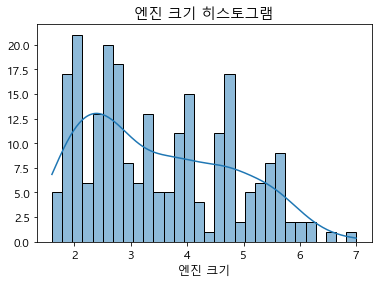

In [11]:
# kde 와 함께 히스토그램 그림.

ax = plt.subplots()
ax = sns.histplot(data=mpg, x='displ', kde=True, bins=30)
ax.set_title('엔진 크기 히스토그램')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('')
# FileSave() # 이미지 저장

In [12]:
# unique() 함수는 구동 방식의 유형에 대하여 확인해줌
# 각 구동 방식에 대한 한글 표현으로 사전 label_dict를 만듦
# 이 사전과 apply() 함수를 이용하여 'drv' 컬럼을 한글 이름으로 변경

print("mpg['drv'].unique()")
print(mpg['drv'].unique())

label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜 구동'}

def setLabel(x):
    return label_dict[x]

idx = 0 # 색상 구분을 위한 카운터 변수
mpg['drv'] = mpg['drv'].apply(setLabel)

print('구동 방식별 갯수')
result = mpg.groupby('drv')['drv'].count()
print(result)

mpg['drv'].unique()
['f' '4' 'r']
구동 방식별 갯수
drv
사륜 구동    103
전륜 구동    106
후륜 구동     25
Name: drv, dtype: int64


- '사륜 구동' 103개, '전륜 구동' 106개, '후륜 구동' 25개임

Text(0, 0.5, '')

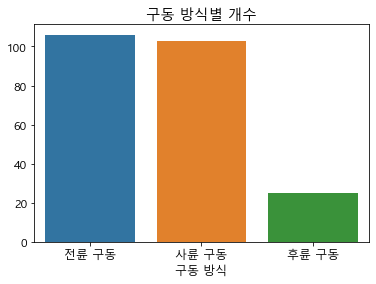

In [13]:
# countplot을 통하여 범주형 데이터인 구동방식을 막대그래프 그려줌

plt.figure()

ax = sns.countplot(x="drv", data=mpg)
ax.set_title('구동 방식별 개수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('')
# FileSave() # 이미지 저장

In [14]:
# 실린더의 개수 파악

print("mpg['cyl'].unique()")
print(mpg['cyl'].unique())

print('실린더 개수')
result = mpg.groupby('cyl')['cyl'].count()
print(result)

mpg['cyl'].unique()
[4 6 8 5]
실린더 개수
cyl
4    81
5     4
6    79
8    70
Name: cyl, dtype: int64


Text(0, 0.5, '')

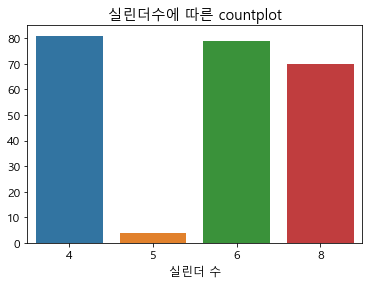

In [15]:
plt.figure()
ax = sns.countplot(x="cyl", data=mpg)
ax.set_title('실린더수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

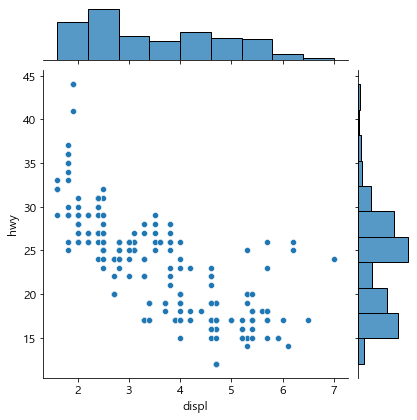

In [16]:
# 엔진 크기와 주행 마일수에 대한 산점도와 히스토그램을 동시에 그려줌.

plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

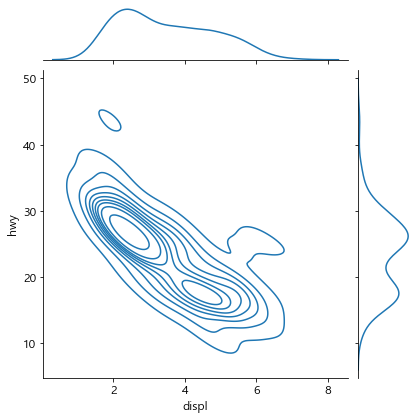

In [17]:
# kind 매개변수는 차트의 종류를 지정
# kde를 사용하면 데이터의 밀집도를 보다 부드러운 선으로 확인 가능

plt.figure()
ax = sns.jointplot(x="displ", y='hwy', data=mpg, kind="kde")
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

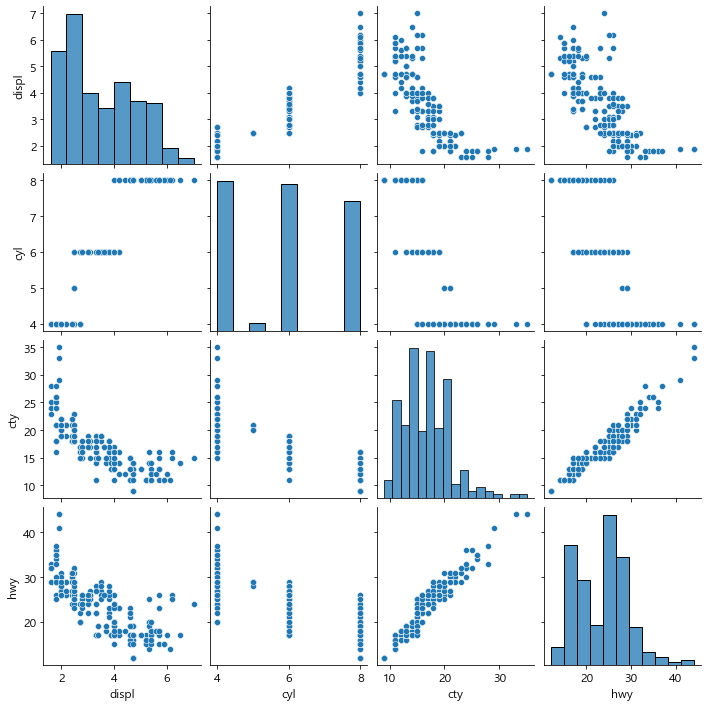

In [18]:
# pairplot 함수를 이용하여 그래프를 그리기 위하여 필요한 컬럼만 추출.
# 숫자형 컬럼만 가능
# 엔진의 크기, 실린더의 수, 도시 주행 마일수, 고속도로 주행 마일수 컬럼만 별도로 추출.

plt.figure()
newmpg = mpg.loc[:, ['displ', 'cyl', 'cty', 'hwy']]
ax = sns.pairplot(data=newmpg)
# FileSave() # 이미지 저장

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

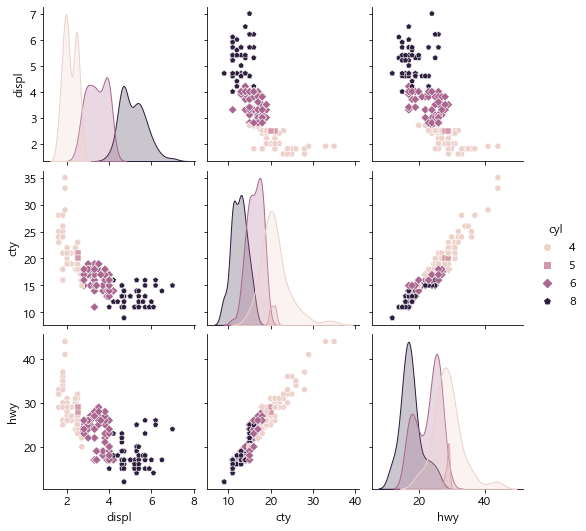

In [19]:
# 실린더의 수를 이용하여 구분

plt.figure()
ax = sns.pairplot(data=newmpg, hue="cyl", markers=["o", "s", "D", "p"])
# FileSave() # 이미지 저장

In [20]:
# 행 방향으로 구동 방식을, 열 방향으로 실린더의 수, 적용할 함수는 개수를 지정함.
# NA 값 혹은 결측치는 0으로 채움

mpg_size = mpg.pivot_table(
    index="drv", columns="cyl", aggfunc="size", fill_value=0)
print('mpg_size')
print(mpg_size)

mpg_size
cyl     4  5   6   8
drv                 
사륜 구동  23  0  32  48
전륜 구동  58  4  43   1
후륜 구동   0  0   4  21


Text(31.0, 0.5, '구동 방식')

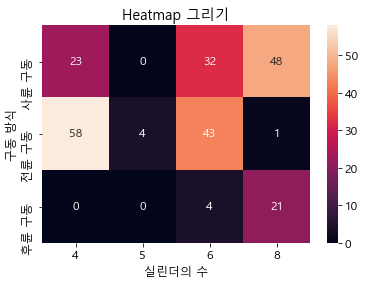

In [21]:
# 히트맵 그림

plt.figure()
# ax = sns.heatmap(mpg_size, annot=True, fmt="d")
ax = sns.heatmap(mpg_size, annot=True, fmt=".2g")
ax.set_title('Heatmap 그리기')
ax.set_xlabel('실린더의 수')
ax.set_ylabel('구동 방식')
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

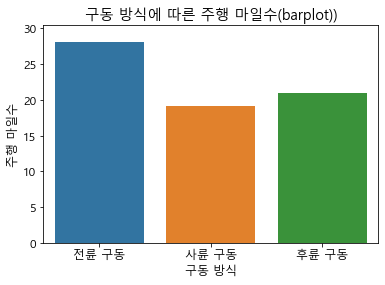

In [22]:
# 바플롯 함수를 사용하여 막대그래프 그림
# 구동 방식에 대한 주행 마일수를 막대 그래프로 그리고, 에러바의 너비는 0으로 지정

plt.figure()
ax = sns.barplot(x="drv", y='hwy', data=mpg, errwidth=0)
ax.set_title('구동 방식에 따른 주행 마일수(barplot))')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

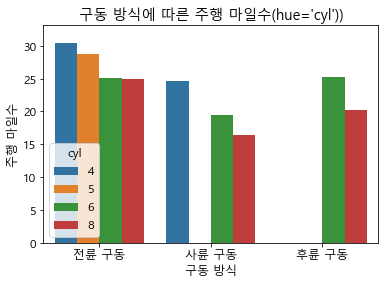

In [23]:
# 실린더의 수를 이용하여 특성을 구분

plt.figure()
ax = sns.barplot(x='drv', y='hwy', hue='cyl', data=mpg, errwidth=0)
ax.set_title("구동 방식에 따른 주행 마일수(hue='cyl'))")
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

In [24]:
# 구동 방식에 따른 간략한 통계 정보 추출

print('구동 방식에 따른 주행 마일수의 통계치 정보')
mygrouping = mpg.groupby('drv')['hwy']
print(mygrouping.describe())


구동 방식에 따른 주행 마일수의 통계치 정보
       count       mean       std   min   25%   50%   75%   max
drv                                                            
사륜 구동  103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
전륜 구동  106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
후륜 구동   25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0


Text(0, 0.5, '주행 마일수')

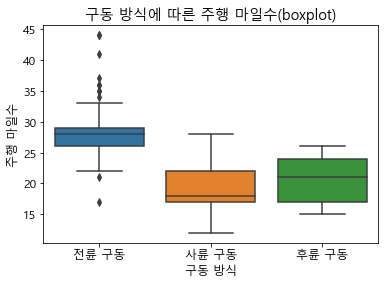

In [25]:
# 구한 통계치 정보를 이용하여 구동 방식에 따른 주행 마일수에 대하여 상자 수염 그래프를 그림.

plt.figure()
ax = sns.boxplot(x='drv', y='hwy', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

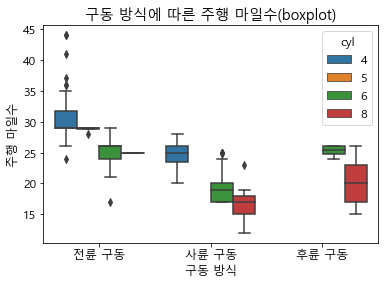

In [26]:
# 구동 방식에 따른 주행 마일수에 대하여 상자 수염 그래프를 그리되, 실린더의 수에 따라서 상자 수염 그래프를 별도로 그림.


plt.figure()
ax = sns.boxplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(boxplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

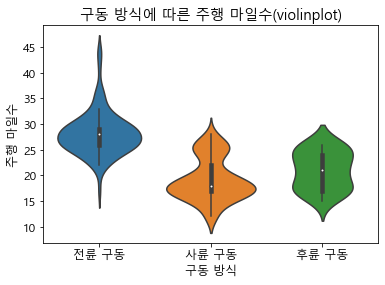

In [27]:
# 바이올린 그래프를 그려봄

plt.figure()
ax = sns.violinplot(x='drv', y='hwy', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(violinplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

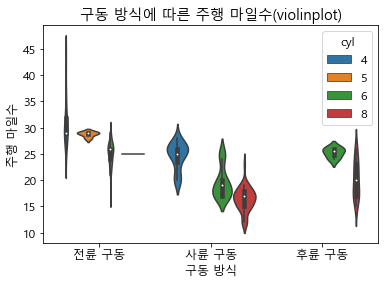

In [28]:
# 동일한 데이터에 대하여 실린더의 수에 따른 바이올린 그래프를 별도로 그림

plt.figure()
ax = sns.violinplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title('구동 방식에 따른 주행 마일수(violinplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

### 구동 방식에 따른 주행 마일수 (stripplot)

- stripplot 함수는 일변량 데이터 셋에 대하여 간략히 요약을 해놓은 그래프
- 일반적으로 주로 작은 데이터 셋을 다루는 용도로 사용이 되며, box 또는 violin 그래프의 보충적인 그래프로 사용.
- 큰 데이터 셋은 주로 히스토그램이나 density 그래프를 많이 사용.
- 매개변수 \
  x, y : x축, y축에 놓여질 데이터를 의미 \
  data : 플로팅을 위한 데이터 셋을 의미 \
  hue : 특성을 구분할 컬럼을 지정 \
  dodge : hue 매개 변수 사용시, dodge 매개 변수의 값이 True 이면 범주형 데이터 축을 따라서 strips 데이터들을 분리. \
  jitter : True 이면 데이터의 개수가 많을 경우, 겹치지 않도록 하여 데이터 분포를 이해하는데 도움을 줌.\
  size : 마커의 크기를 지정하는 옵션
  

Text(0, 0.5, '주행 마일수')

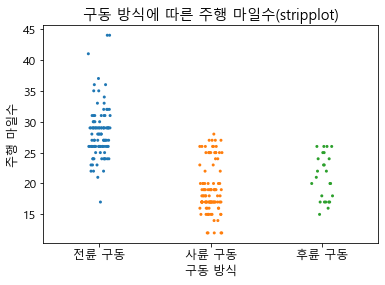

In [30]:
# 구동 방식에 따른 주행 마일 수를 이용하여 stripplot 그래프 그림.

STRIP_SIZE = 3

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

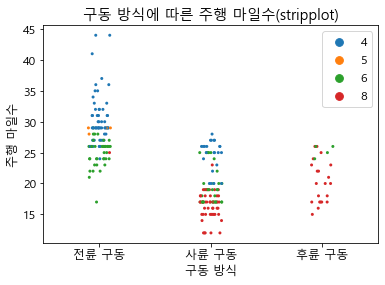

In [31]:
# 매개변수 hue=cyl 를 사용하여 실린더의 개수에 따른 색상을 서로 다르게 지정.

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl', data=mpg, jitter=True, size=STRIP_SIZE)
ax.set_title('구동 방식에 따른 주행 마일수(stripplot)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
plt.legend(loc=1)
# FileSave() # 이미지 저장

Text(0, 0.5, '주행 마일수')

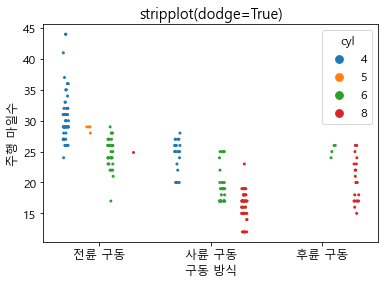

In [32]:
# dodge = True이면 hue 매개 변수에 의하여 지정된 값들이 서로 분리되어 그려짐.

plt.figure()
ax = sns.stripplot(x='drv', y='hwy', hue='cyl',
              data=mpg, jitter=True, dodge=True, size=STRIP_SIZE)
ax.set_title('stripplot(dodge=True)')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

### 구동 방식에 따른 주행 마일수 (swarmplot)

- swarmplot 함수는 strippot 함수와 유사
- 하지만 점들이 보정(adjusted) 도기 때문에 서로 겹치지 않음.
- 이러한 기능은 값의 분포를 표현하는 데에는 좋지만, 큰 수의 관찰 값에는 양을 어림잡는 데는 좋지 않음.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

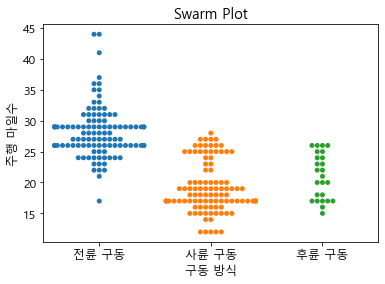

In [33]:
# 각 구동방식에 따른 swarmplot 그래프 그림

plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', data=mpg)
ax.set_title('Swarm Plot')
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


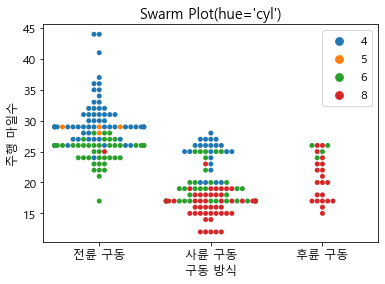

In [34]:
# 각 구동방식에 따른 swarmplot을 그리되, 실린더의 개수에 따라 서로 색상을 다르게 해줌

plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg)
ax.set_title("Swarm Plot(hue='cyl')")
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
plt.legend(loc=1)
# FileSave() # 이미지 저장

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '주행 마일수')

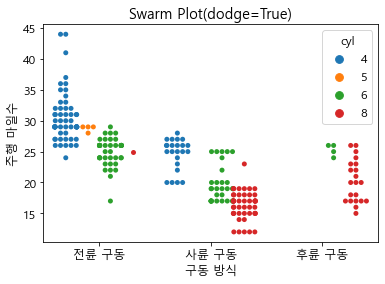

In [35]:
# 매개 변수 dodge = True를 사용하여 실린더의 개수별로 별도의 데이터로 분리해서 그림.

plt.figure()
ax = sns.swarmplot(x='drv', y='hwy', hue='cyl', data=mpg, dodge=True)
ax.set_title("Swarm Plot(dodge=True)")
ax.set_xlabel('구동 방식')
ax.set_ylabel('주행 마일수')
# FileSave() # 이미지 저장

Text(0, 0.5, '구동 방식')

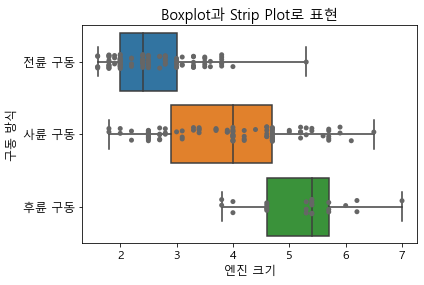

In [36]:
# 상자 수염 그래프와 stripplot의 혼합하여 그래프를 그려봄

import numpy as np
plt.figure()
sns.boxplot(x='displ', y='drv', data=mpg, whis=np.inf)
ax = sns.stripplot(x='displ', y='drv', data=mpg, jitter=True, color="0.4")
ax.set_title("Boxplot과 Strip Plot로 표현")
ax.set_xlabel('엔진 크기')
ax.set_ylabel('구동 방식')
# FileSave() # 이미지 저장

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '엔진 크기')

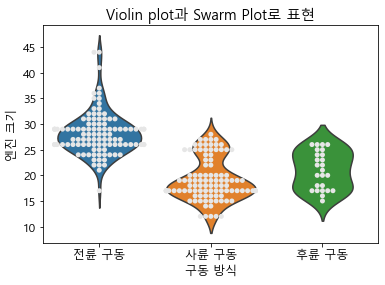

In [37]:
# 바이올린 그래프와 swarmplot을 혼합하여 그려봄.

plt.figure()
sns.violinplot(x='drv', y='hwy', data=mpg, inner=None)
ax = sns.swarmplot(x='drv', y='hwy', data=mpg, color="0.9")
ax.set_title("Violin plot과 Swarm Plot로 표현")
ax.set_xlabel('구동 방식')
ax.set_ylabel('엔진 크기')
# FileSave() # 이미지 저장

finished


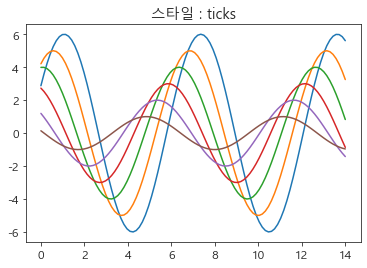

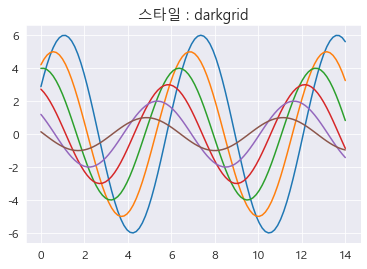

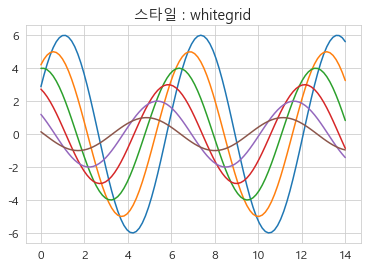

In [38]:
# set_style 함수는 미적인 감각을 추가하기 위한 스타일을 지정하는 함수


def sine_plot(mytitle):
    plt.figure()
    plt.rc('font', family='Malgun Gothic')
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
    plt.title('스타일 : ' + mytitle)
    # FileSave() # 이미지 저장

styles = ["ticks", "darkgrid", "whitegrid"]
for one in styles:
    sns.set_style(one)
    sine_plot(one)

print('finished')